## Geometric Primitives

In [141]:
import numpy as np
import matplotlib.pylab as plt

## Line Equation in Vector Form

Let's we have points at $[2, 3]$ and $[5, 7]$ . 

The direction vector is calculated by $ [5, 7] - [2, 3] = [3, 4] $

Then the line equation is $ \frac{x-2}{3} = \frac{y-3}{4}  $

Let's convert to the standard form like $ax + by + c = 0$

$ 4x - 8 = 3y - 9 $ <br>
$ 4x-3y+1 = 0 $

If we convert in to $y = mx + b$ <br>
$ -3y = -4x -1 $ <br>
$ y = \frac{4}{3} + \frac{1}{3} $


In [142]:
def line_eq_from_twoPoints(p0, p1):
    p0 = np.array(p0)
    p1 = np.array(p1)

    # direction vector
    d_vector = p1 - p0

    # coefficient a = d_vector[0]
    a = d_vector[1] 
    b = -d_vector[0]
    c = a*(-p0[0]) - (b*(p0[1]))
    
    # convert y = Mx + B
    
    M = -a / b
    B = -c / b
    
    return a, b, c, M, B



In [143]:
def draw_lines(p0, p1, p2, p3):

    %matplotlib inline
    
    X_max = max(p0[0], p1[0], p2[0], p3[0])
    X_min = min(p0[0], p1[0], p2[0], p3[0])

    if X_min < 0 and X_max < 0  :
        x_vals = np.linspace(X_min * 2 , X_max * -2, 100) # Create 100 values of Xs
    
    elif X_min < 0 and X_max >= 0:
        x_vals = np.linspace(X_min * 2 , X_max * 2, 100) # Create 100 values of Xs
            
    elif X_min >= 0 :
        x_vals = np.linspace(X_min * -2 , X_max * 2, 100) # Create 100 values of Xs

    
    a,b,c,M,B = line_eq_from_twoPoints(p0, p1)
    a1,b1,c1,M1,B1 = line_eq_from_twoPoints(p2, p3)
    
    plt.figure(figsize = (10,8)) # Create a graph of size 10 by 8
    
    plt.plot(x_vals, M * x_vals + B, label = "p0,p1") # Plot the line through p0 and p1
    plt.plot(x_vals, M1 * x_vals + B1, label = "p2,p3") # Plot the line through p2 and p3
    plt.scatter(p0[0], p0[1], color = 'blue')
    plt.scatter(p1[0], p1[1], color = 'blue')
    
    plt.scatter(p2[0], p2[1], color = 'orange')
    plt.scatter(p3[0], p3[1], color = 'orange')
    
    plt.legend()
    plt.show 
    return

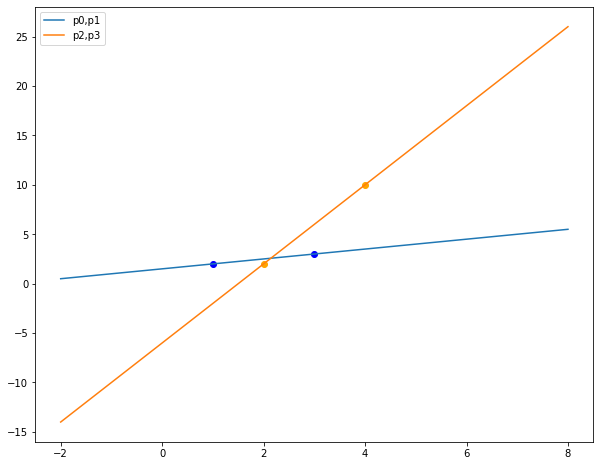

In [144]:
p0 = [3, 3]
p1 = [1, 2]
p2 = [4, 10]
p3 = [2, 2]
draw_lines(p0, p1, p2, p3)

## Make a Projective Space

### Positive Z direction is into the screen!

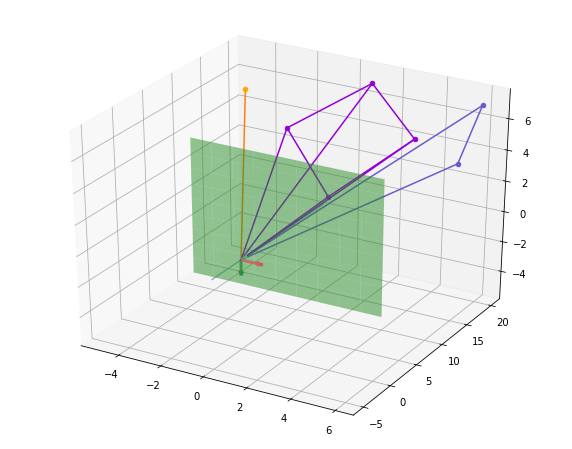

In [145]:
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot([0, 0], [-5, 15], zs=[0, 0], alpha = 0.5)  # principal axis

# The three sets of square bracket contain as first element the starting
# point, i.e. 0, 0, 0 (as in  x, y ,z coordinates)
# The second element in each square bracket represents the end-point, i.e. 2, -1, 0 

# a point at [-5, 20, 5]
ax.plot([0, -5], [0, 20], zs=[0, 5])
ax.scatter( [-5], [20], [5], marker = 'o', color='orange')


# a line at from [5, 20, 3] to [6, 20, 7]
ax.plot([5, 6], [20, 20], zs=[3, 7], color='slateblue')
ax.plot([0, 5], [0, 20], zs=[0, 3], color='slateblue')
ax.plot([0, 6], [0, 20], zs=[0, 7], color='slateblue')
ax.scatter( [5], [20], [3], marker = 'o', color='slateblue')
ax.scatter( [6], [20], [7], marker = 'o', color='slateblue')



# a plane with [-3, 20, 3], [1, 20, 7], [3, 20, 4], [-1, 20, -1] verticies. 

ax.plot([-3, 1], [20, 20], zs=[3, 7], color='darkviolet')
ax.plot([1, 3], [20, 20], zs=[7, 4], color='darkviolet')
ax.plot([3, -1], [20, 20], zs=[4, -1], color='darkviolet')
ax.plot([-1, -3], [20, 20], zs=[-1, 3], color='darkviolet')


ax.plot([0, -3], [0, 20], zs=[0, 3], color='darkviolet')
ax.plot([0, 1], [0, 20], zs=[0, 7], color='darkviolet')
ax.plot([0, 3], [0, 20], zs=[0, 4], color='darkviolet')
ax.plot([0, -1], [0, 20], zs=[0, -1], color='darkviolet')

ax.scatter( [-3], [20], [3], marker = 'o', color='darkviolet')
ax.scatter( [1], [20], [7], marker = 'o', color='darkviolet')
ax.scatter( [3], [20], [4], marker = 'o', color='darkviolet')
ax.scatter( [-1], [20], [-1], marker = 'o', color='darkviolet')



# ax.plot([0, 10], [0, 20], zs=[0, 15])


######## Computer Vision axis ############################
ax.quiver(
        0, 0, 0, # <-- starting point of vector
        1, 0 - 0, 0 - 0, # <-- directions of vector
        color = 'indianred', alpha = .8, lw = 3,
    ) # X
ax.quiver(
        0, 0, 0, # <-- starting point of vector
        0, 1, 0, # <-- directions of vector
        color = 'skyblue', alpha = .8, lw = 3,
    ) # Z
ax.quiver(
        0, 0, 0, # <-- starting point of vector
        0, 0, -1, # <-- directions of vector
        color = 'seagreen', alpha = .8, lw = 3,
    ) # Y



########### make a image plane ################################


# put image plane in positive Z direction


# xs = np.linspace(-5, 5, 20)
# zs = np.linspace(-5, 5, 20)
xs = np.arange(-5, 5)
zs = np.arange(-5,5)

X, Z = np.meshgrid(xs, zs)
Y = 10


ax.plot_surface(X, Y, Z, alpha = 0.5)



plt.show();

### Line and Point Duality

As you can see the point in image (homogeneous coordinate system) is a ray in projective space. <br> A line is a plane of rays through origin. all the rays (x, y, z) are satisfying : ax + by + cz = 0

In [150]:

# Get the line equations from two points on the image plane (homogeneous coordinates).

# Let two points on the image plane as A and B. The line equation can be found by following
# precedure

A = np.array( [2,-1, 1])
B = np.array([1, 4, 1])

l = np.cross(A, B)
l = l / np.sqrt(l[0]**2 + l[1]**2) # (a, b, c)
l = l/l[2]

print("a : {:0.2f} , b : {:0.2f} , c : {:0.2f} ".format(l[0], l[1], l[2]))

a : -0.56 , b : -0.11 , c : 1.00 


Get a intersec points from two lines (homogeneous coordinates).

Reused the line equation of l and let's find an other line equation from two points C and D.

In [151]:
C = np.array([3, -2, 1])
D = np.array([5, 4, 1])
l_2 = np.cross(C, D)
l_2 = l_2 / np.sqrt(l_2[0] **2 + l[1]**2)
l_2 = l_2/l_2[2]
print(l_2)


[-0.27272727  0.09090909  1.        ]


In [152]:
# Now we have two line equations. Let's find point that intersect the two lines
intersect_point = np.cross(l, l_2)
intersect_point = intersect_point / intersect_point[2]
print(intersect_point)

[ 2.5 -3.5  1. ]


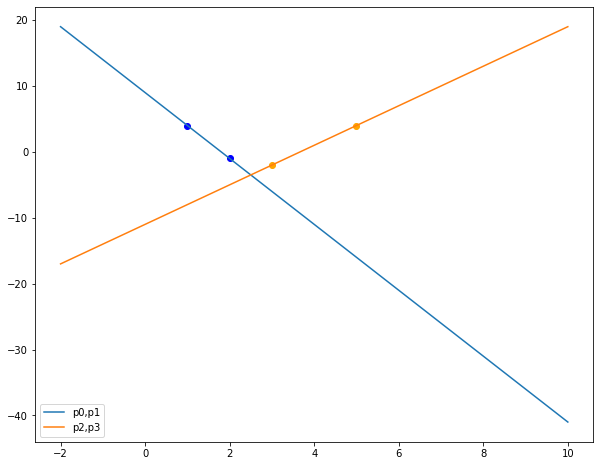

In [153]:
p0 = A[:2]
p1 = B[:2]
p2 = C[:2]
p3 = D[:2]
draw_lines(p0, p1, p2, p3)

# Can you imagine Point at infinity and line at infinity?
- give an example of point at infinity
   
- give an example of line at infinity